In [1702]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, TweedieRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

original_data = pd.read_csv('Diamonds_train.csv', 
                            index_col='Unnamed: 0')

In [1703]:
original_data.sample(7)

carat        cut color clarity  depth  table  price     x     y     z
17940   1.25    Premium     H     VS2   60.4   59.0   7246  6.92  6.96  4.19
31514   0.34      Ideal     E     SI1   61.7   56.0    765  4.52  4.49  2.78
35720   0.30    Premium     D     VS2   60.4   59.0    911  4.35  4.32  2.62
22418   1.25      Ideal     D     VS1   61.7   56.0  10441  6.92  7.01  4.30
2712    0.25       Fair     D     VS1   61.2   55.0    563  4.09  4.11  2.51
28376   0.24    Premium     E    VVS1   60.3   61.0    668  4.06  4.03  2.44
2112    0.83  Very Good     F     SI1   63.1   58.0   3118  5.98  5.94  3.76

In [1704]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 1 to 43152
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43081 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [1705]:
original_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


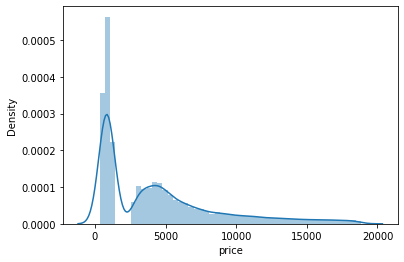

In [1706]:
sns.distplot(original_data['price']) # tweedie distribution

In [1707]:
original_data.groupby('color').mean()['depth']

color
D    61.705975
E    61.676968
F    61.724917
G    61.749030
H    61.834516
I    61.817808
J    61.904112
Name: depth, dtype: float64

In [1708]:
original_data.groupby('cut').mean()['depth'] 
# вот здесь различается по категориям, можно попробовать так заполнить

cut
Fair         64.113022
Good         62.433128
Ideal        61.718572
Premium      61.273436
Very Good    61.829922
Name: depth, dtype: float64

In [1709]:
original_data.groupby('clarity').mean()['depth']

clarity
I1      62.774614
IF      61.534917
SI1     61.872674
SI2     61.765281
VS1     61.677227
VS2     61.726549
VVS1    61.622322
VVS2    61.671577
Name: depth, dtype: float64

In [1710]:
Y = original_data.price

In [1711]:
X = original_data.drop('price', axis=1)

In [1712]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [1713]:
x_train.isna().sum()[:10]

carat       0
cut         0
color       0
clarity     0
depth      48
table       0
x           0
y           0
z           0
dtype: int64

In [1714]:
x_train['depth'] = x_train.groupby('cut')['depth'].apply(lambda x:x.fillna(x.mean()))
x_test['depth'] = x_test.groupby('cut')['depth'].apply(lambda x:x.fillna(x.mean()))

# Методы замены пропущенных значений

In [ ]:
from sklearn.impute import SimpleImputer
SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
IterativeImputer(random_state=0)
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
print(np.round(imp.transform(X_test)))

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")

In [1715]:
x_train = pd.get_dummies(data=x_train, drop_first=True)
x_test = pd.get_dummies(data=x_test, drop_first=True)

In [1716]:
x_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [1717]:
x_train.isna().sum()[:10]

carat            0
depth            0
table            0
x                0
y                0
z                0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
dtype: int64

In [1718]:
scaler = StandardScaler()

scaled_train_data = pd.DataFrame(
    scaler.fit_transform(x_train),
    columns = x_train.columns)

scaled_test_data = pd.DataFrame(
    scaler.transform(x_test),
    columns = x_test.columns)

# Normalization
<img src="minmax.png" alt="Alternative text" />

# Standartization
<img src="stand.png" alt="Alternative text" />

In [1719]:
scaled_train_data

carat     depth     table         x         y         z  cut_Good  \
0     -0.173736  0.172714 -0.216824  0.044676  0.073763  0.083970 -0.314959   
1     -0.681370 -0.532639  1.143570 -0.615022 -0.578336 -0.648489 -0.314959   
2      0.782958  0.172714 -0.216824  0.902282  0.822470  0.896333 -0.314959   
3     -0.759467 -0.179963 -1.123753 -0.697484 -0.658842 -0.701758 -0.314959   
4     -0.954711  0.736996 -0.216824 -1.085056 -1.037221 -1.008059 -0.314959   
...         ...       ...       ...       ...       ...       ...       ...   
30201  1.271067 -0.673710  1.143570  1.199146  1.249152  1.149364  3.175012   
30202  0.314373 -0.673710  0.690105  0.489971  0.508496  0.430223 -0.314959   
30203 -0.408029 -3.142446  2.957428 -0.062525 -0.111401 -0.422092  3.175012   
30204  0.939153  1.230743 -0.216824  0.960006  0.846622  1.069460 -0.314959   
30205  2.286334  2.641449 -0.216824  1.693919  1.716088  2.121537  3.175012   

       cut_Ideal  cut_Premium  cut_Very Good  ...   color_H   color_I  \
0       1.242442    -0.603332      -0.533066  ... -0.435793 -0.340304   
1      -0.804866    -0.603332       1.875940  ... -0.435793 -0.340304   
2       1.242442    -0.603332      -0.533066  ... -0.435793  2.938552   
3       1.242442    -0.603332      -0.533066  ... -0.435793 -0.340304   
4      -0.804866    -0.603332       1.875940  ... -0.435793 -0.340304   
...          ...          ...            ...  ...       ...       ...   
30201  -0.804866    -0.603332      -0.533066  ...  2.294669 -0.340304   
30202  -0.804866     1.657461      -0.533066  ... -0.435793 -0.340304   
30203  -0.804866    -0.603332      -0.533066  ... -0.435793 -0.340304   
30204  -0.804866    -0.603332       1.875940  ...  2.294669 -0.340304   
30205  -0.804866    -0.603332      -0.533066  ... -0.435793  2.938552   

        color_J  clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  \
0     -0.240993   -0.191264     1.779100    -0.470040    -0.419271   
1     -0.240993   -0.191264     1.779100    -0.470040    -0.419271   
2     -0.240993   -0.191264    -0.562082     2.127478    -0.419271   
3     -0.240993   -0.191264     1.779100    -0.470040    -0.419271   
4     -0.240993   -0.191264     1.779100    -0.470040    -0.419271   
...         ...         ...          ...          ...          ...   
30201 -0.240993   -0.191264     1.779100    -0.470040    -0.419271   
30202 -0.240993   -0.191264    -0.562082    -0.470040     2.385092   
30203 -0.240993   -0.191264    -0.562082    -0.470040    -0.419271   
30204 -0.240993   -0.191264    -0.562082     2.127478    -0.419271   
30205 -0.240993   -0.191264    -0.562082    -0.470040     2.385092   

       clarity_VS2  clarity_VVS1  clarity_VVS2  
0        -0.529583     -0.271802     -0.319511  
1        -0.529583     -0.271802     -0.319511  
2        -0.529583     -0.271802     -0.319511  
3        -0.529583     -0.271802     -0.319511  
4        -0.529583     -0.271802     -0.319511  
...            ...           ...           ...  
30201    -0.529583     -0.271802     -0.319511  
30202    -0.529583     -0.271802     -0.319511  
30203    -0.529583     -0.271802     -0.319511  
30204    -0.529583     -0.271802     -0.319511  
30205    -0.529583     -0.271802     -0.319511  

[30206 rows x 23 columns]

In [1720]:
LR_model = LinearRegression().fit(scaled_train_data, y_train)

LR_y_pred = LR_model.predict(scaled_test_data)

In [1721]:
LR_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': LR_y_pred})

# предсказанная отрицательная цена - это не то же самое, 
# что и положительное значение, поэтому без abs
# на самом деле это знак, что данная модель не (совсем) подходит этим данным
# то есть плохо предсказывает дешевые алмазы

LR_results_df.head(20)

Actual     Predicted
7658     4269   4097.768406
9767     4662   4907.646409
24138   12308  10692.419574
22881   10922   9239.092658
33267     826   1461.722996
36657     949   1440.529065
1661     3024   4134.803971
5487     3841   4451.394905
21691     626    178.047237
2485     3195   4554.307797
8697     4459   4843.157285
10294    4758   3952.491194
6446     4047   4223.131916
34317     859   1346.524864
10974    4907   4963.694346
29628     441  -1052.681714
27047     645    498.485776
7159     4181   4840.957513
31990     776    584.324612
37634     990    722.574167

In [1722]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LR_y_pred)))

Mean Absolute Error: 816.9338964080973
Mean Squared Error: 1429410.5996915086
Root Mean Squared Error: 1195.579608261829


In [1723]:
# это расширение линейной регрессии для работы с "ненормально" распределенными данными
TR = TweedieRegressor(power=1.0,
                      max_iter=500,
                      alpha=0.5,
                      link='log').fit(scaled_train_data, y_train)

TR_y_pred = TR.predict(scaled_test_data)

# Распределение tweedie
<img src="tweedie-distribution.png" alt="Alternative text" />

In [1724]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': TR_y_pred})

results_df.head(20)

Actual     Predicted
7658     4269   3567.830068
9767     4662   4648.464895
24138   12308  11139.299079
22881   10922  11266.156778
33267     826    930.889066
36657     949    861.690492
1661     3024   3754.823192
5487     3841   3477.216012
21691     626    712.470989
2485     3195   3817.674233
8697     4459   4165.179232
10294    4758   3892.127803
6446     4047   3069.462485
34317     859    932.975598
10974    4907   4686.561900
29628     441    586.865709
27047     645    772.615795
7159     4181   4285.510195
31990     776    709.188961
37634     990    969.992219

In [1725]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, TR_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, TR_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, TR_y_pred)))

Mean Absolute Error: 505.0904633732999
Mean Squared Error: 892089.5341280167
Root Mean Squared Error: 944.5049148247015
